In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import skew, zscore
import sklearn

In [3]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,mean_absolute_error
from sklearn.preprocessing import LabelEncoder,StandardScaler,power_transform
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,RandomForestClassifier,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings("ignore")

In [4]:
dh=pd.read_csv("abal.csv")
dh.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
pd.set_option("display.max_rows",None)
dh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
dh.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [7]:
dh.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [8]:
dh.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# Exploratory Data Analysis

In [9]:
dh.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

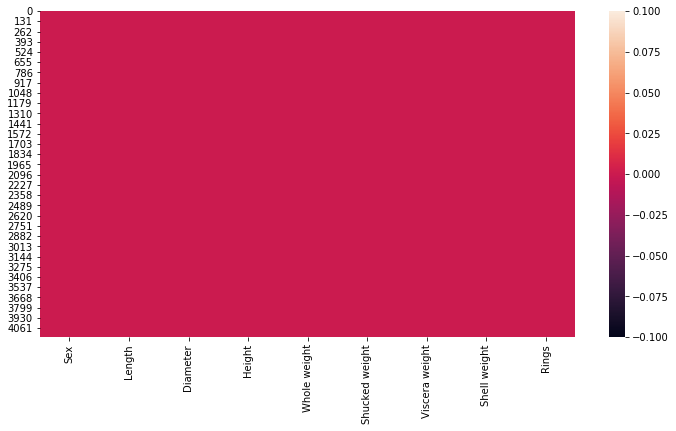

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(dh.isnull())

In [11]:
dh["Rings"].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

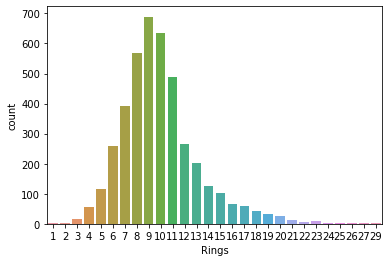

In [12]:
sns.countplot(dh.Rings)

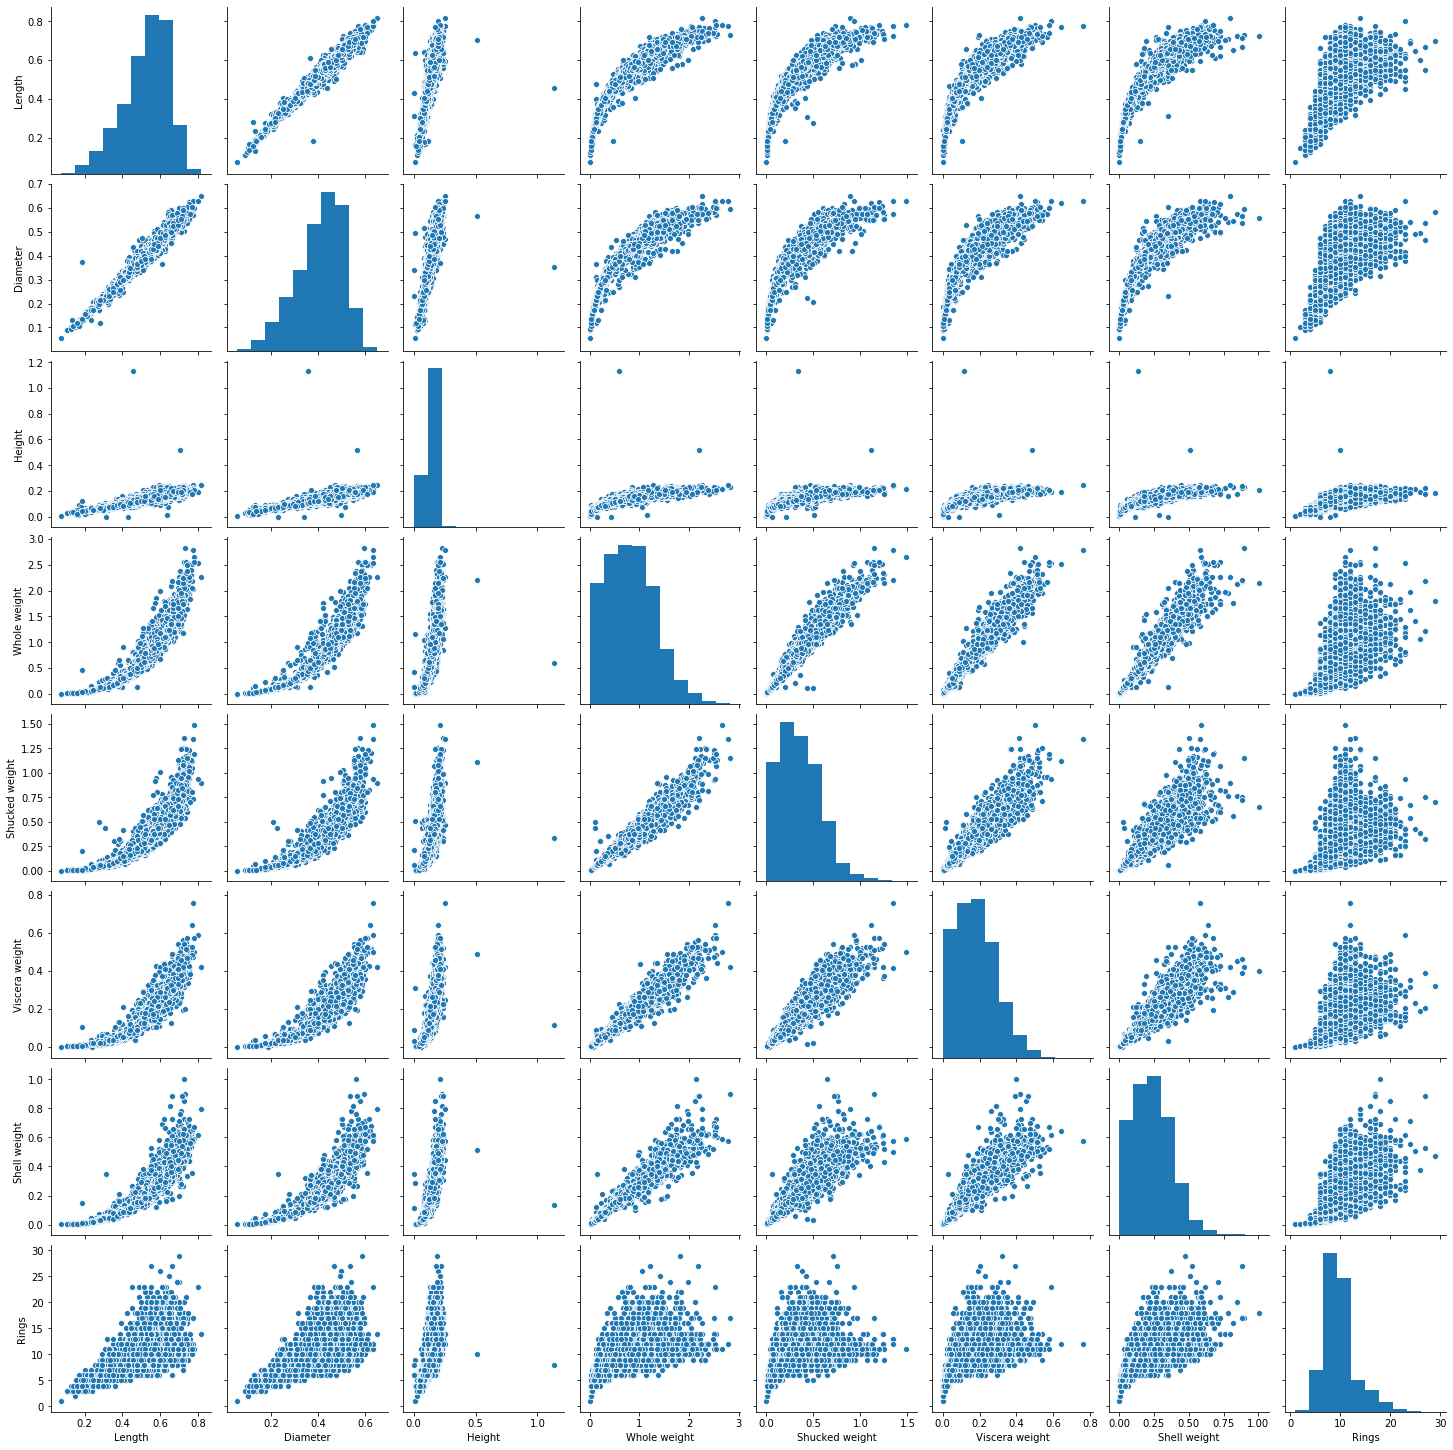

In [13]:
sns.pairplot(dh)

In [14]:
dh.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [15]:
corr_mat=dh.corr()
corr_mat["Rings"].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Name: Rings, dtype: float64

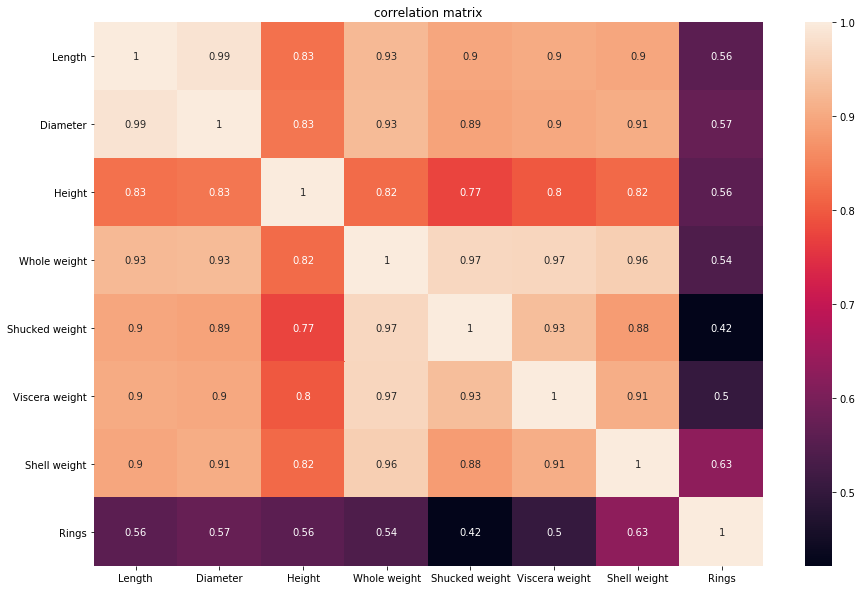

In [16]:
plt.figure(figsize=(15,10))
plt.title("correlation matrix")
sns.heatmap(dh.corr(),annot=True)

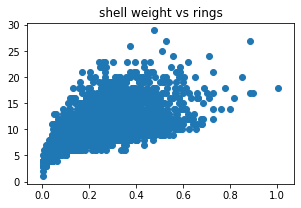

In [17]:
plt.figure(figsize=(12,8))
plt.subplot(3,3,1)
plt.title("shell weight vs rings")
plt.scatter(dh['Shell weight'],dh['Rings'])
plt.tight_layout()

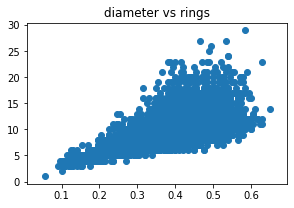

In [18]:
plt.figure(figsize=(12,8))
plt.subplot(3,3,2)
plt.title("diameter vs rings")
plt.scatter(dh['Diameter'],dh['Rings'])
plt.tight_layout()

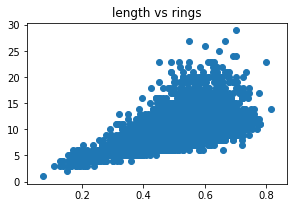

In [19]:
plt.figure(figsize=(12,8))
plt.subplot(3,3,3)
plt.title("length vs rings")
plt.scatter(dh['Length'],dh['Rings'])
plt.tight_layout()

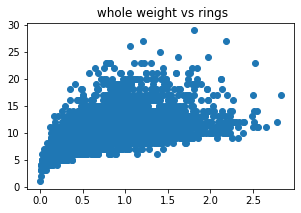

In [20]:
plt.figure(figsize=(12,8))
plt.subplot(3,3,4)
plt.title(" whole weight vs rings")
plt.scatter(dh['Whole weight'],dh['Rings'])
plt.tight_layout()

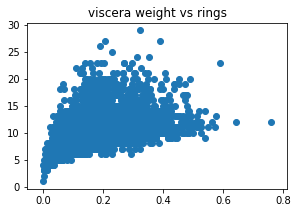

In [21]:
plt.figure(figsize=(12,8))
plt.subplot(3,3,5)
plt.title("viscera weight vs rings")
plt.scatter(dh['Viscera weight'],dh['Rings'])
plt.tight_layout()

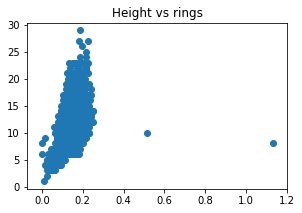

In [22]:
plt.figure(figsize=(12,8))
plt.subplot(3,3,6)
plt.title("Height vs rings")
plt.scatter(dh['Height'],dh['Rings'])
plt.tight_layout()

In [23]:
dh['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [24]:
Label=LabelEncoder()
dh['Sex']=Label.fit_transform(dh['Sex'])
dh.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# count plot

Text(0.5, 1.0, 'SEX')

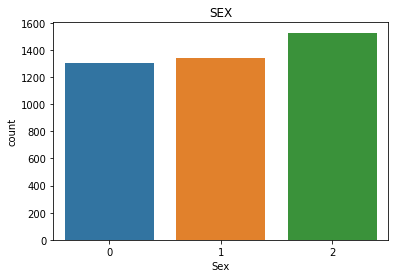

In [25]:
sns.countplot(x='Sex',data=dh)
plt.title('SEX')

# Distribution plot

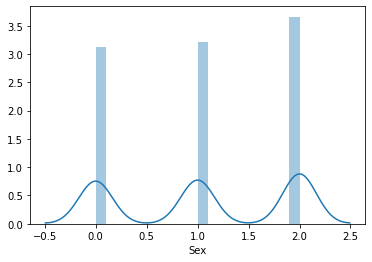

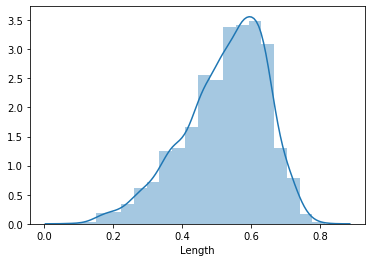

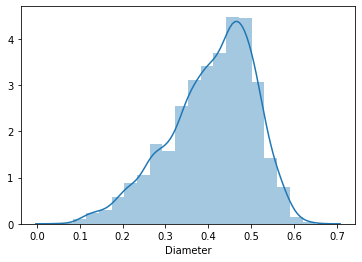

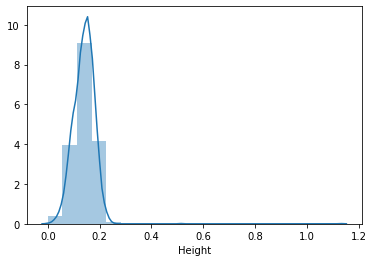

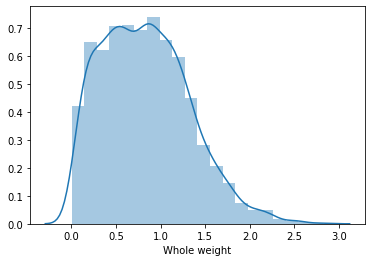

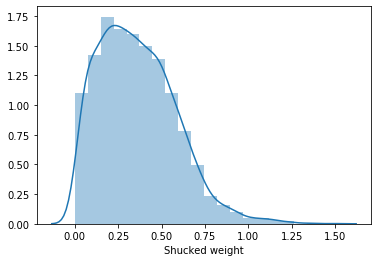

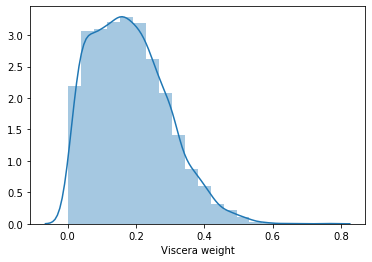

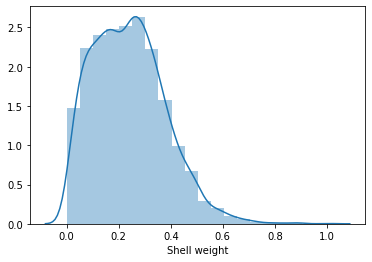

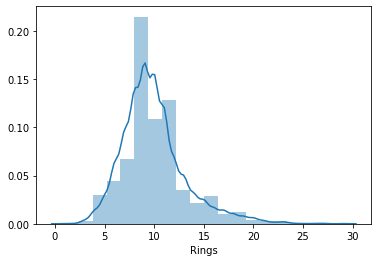

In [26]:
for i in dh.columns:
    plt.figure()
    sns.distplot(dh[i],bins=20)

In [27]:
dh.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

# Removing skewness

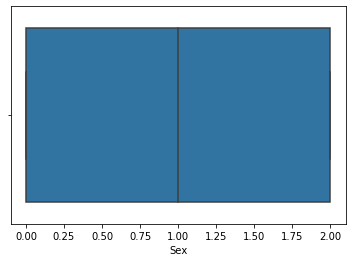

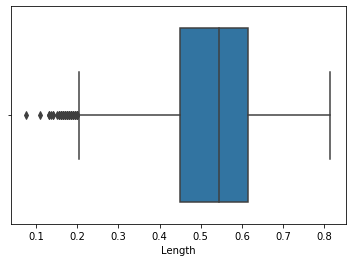

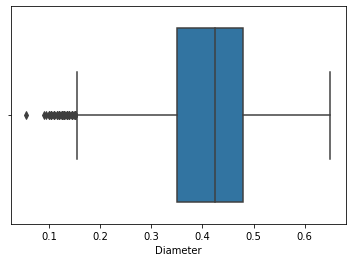

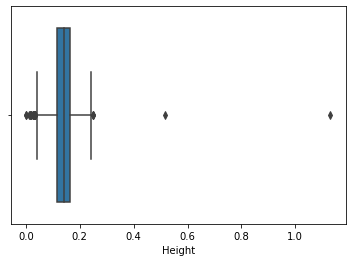

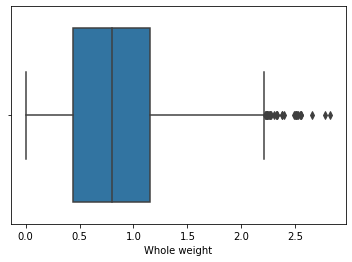

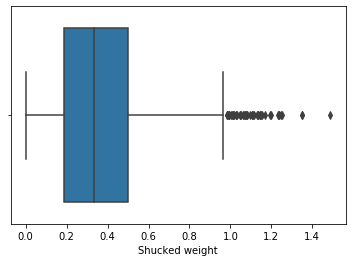

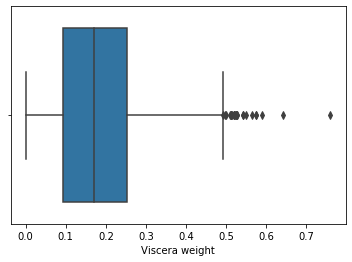

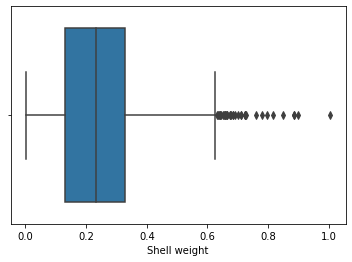

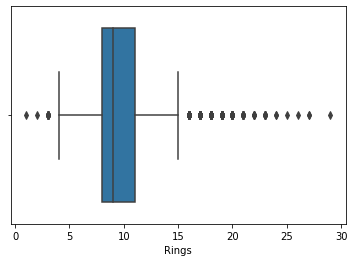

In [28]:
for i in dh.columns:
    plt.figure()
    sns.boxplot(dh[i])

In [29]:
Y=dh.pop('Rings')

In [30]:
x_train,y_train,x_test,y_test=train_test_split(dh,Y,test_size=.30,random_state=45)

In [31]:
x_train.skew()

Sex              -0.080656
Length           -0.655605
Diameter         -0.622766
Height            4.063343
Whole weight      0.515000
Shucked weight    0.702454
Viscera weight    0.575359
Shell weight      0.622781
dtype: float64

In [32]:
dh_new=power_transform(x_train,method='yeo-johnson')
dh_new=pd.DataFrame(dh_new,columns=x_train.columns)
dh_new.skew()

Sex              -0.169139
Length           -0.072897
Diameter         -0.070275
Height           -0.142984
Whole weight     -0.004845
Shucked weight    0.026693
Viscera weight    0.041209
Shell weight      0.023257
dtype: float64

# Removing outliers:

In [33]:
z=np.abs(zscore(dh))

In [34]:
threshold=3
print(np.where(z>3))

(array([  81,  129,  163,  164,  165,  165,  165,  166,  168,  170,  236,
        236,  236,  237,  237,  238,  238,  239,  277,  334,  358,  358,
        526,  526,  694,  696,  696,  719,  719,  720,  720,  891,  891,
        891, 1048, 1051, 1051, 1052, 1193, 1197, 1199, 1202, 1204, 1206,
       1206, 1207, 1207, 1207, 1207, 1209, 1209, 1257, 1417, 1417, 1418,
       1422, 1426, 1427, 1427, 1427, 1428, 1429, 1429, 1528, 1754, 1756,
       1757, 1759, 1761, 1762, 1762, 1762, 1763, 1763, 1763, 1821, 1982,
       1986, 1987, 1987, 2051, 2090, 2108, 2114, 2114, 2157, 2161, 2208,
       2274, 2334, 2334, 2368, 2381, 2544, 2623, 2624, 2624, 2624, 2625,
       2709, 2710, 2710, 2810, 2810, 2811, 2811, 2811, 2862, 2863, 2863,
       2863, 3007, 3008, 3148, 3149, 3151, 3188, 3427, 3427, 3427, 3599,
       3599, 3628, 3713, 3715, 3715, 3715, 3715, 3800, 3837, 3899, 3899,
       3902, 3961, 3962, 3996, 4145, 4148], dtype=int64), array([7, 7, 7, 7, 4, 5, 7, 7, 7, 6, 1, 2, 3, 1, 2, 1, 2, 1, 7, 7

In [35]:
dh_new=dh[(z<3).all(axis=1)]
print(dh.shape)
print(dh_new.shape)

(4177, 8)
(4084, 8)


# percentage of Dataloss

In [36]:
loss=(4177-4084)/4177*100
print(loss)

2.2264783337323437


In [37]:
x=dh_new.iloc[:,:-1]
y=dh_new.iloc[:,-1]

In [38]:
x_test.ndim

1

In [39]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
